# Lab 5: Wide and Deep Networks

## Preparation

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

In [1]:
import pandas as pd

df = pd.read_csv('Diamond Prices2022.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
import sklearn
from sklearn.model_selection import train_test_split

df_target = df['price']
df_data = df.drop(['price'], axis=1)

X = df_data.copy()
y = df_target.copy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2)
y_train.describe()



count    43154.000000
mean      3932.584998
std       3990.856571
min        326.000000
25%        954.000000
50%       2400.000000
75%       5324.000000
max      18818.000000
Name: price, dtype: float64

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

y_train = pd.cut(y_train, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)
y_test = pd.cut(y_test, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)

y_train.value_counts()


under-budget    38970
over-budget      4184
Name: price, dtype: int64

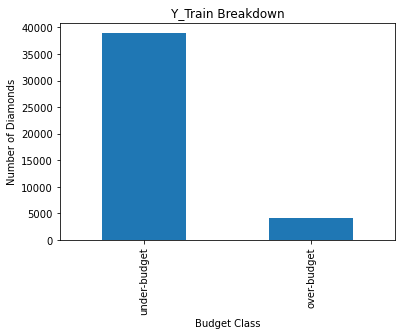

In [4]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.title('Y_Train Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

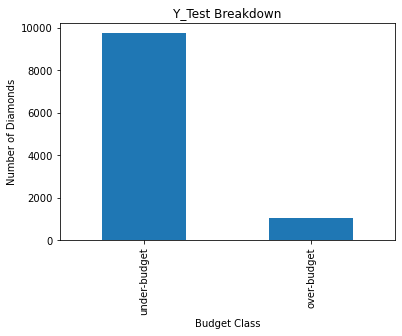

In [5]:
y_test.value_counts()
count = y_test.value_counts()
count.plot.bar()
plt.title('Y_Test Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

In [6]:
numeric_headers = ['carat', 'depth', 'table', 'x', 'y', 'z']

ss = StandardScaler()
X_train[numeric_headers] = ss.fit_transform(X_train[numeric_headers].values)
X_test[numeric_headers] = ss.transform(X_test[numeric_headers].values)

In [7]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
45591,-0.587167,Ideal,E,VS2,-0.590979,-0.203711,-0.465667,-0.440346,-0.507184
2936,-0.060365,Good,E,VS2,1.149562,-0.203711,0.060060,0.090293,0.212054
48619,-0.207870,Very Good,I,SI1,1.219184,0.688794,-0.073600,-0.101085,0.056924
7948,0.761447,Premium,G,SI2,0.174859,0.688794,0.897659,0.768816,0.846675
1961,-0.060365,Ideal,H,SI1,-0.312492,-0.649964,0.122434,0.151186,0.099232


In [8]:
categorical_headers = ['cut', 'color', 'clarity']

for col in categorical_headers:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()
    lb = LabelEncoder()
    X_train[col+'_int'] = lb.fit_transform(X_train[col])
    X_test[col+'_int'] = lb.transform(X_test[col])

In [9]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_int,color_int,clarity_int
45591,-0.587167,Ideal,E,VS2,-0.590979,-0.203711,-0.465667,-0.440346,-0.507184,2,1,5
2936,-0.060365,Good,E,VS2,1.149562,-0.203711,0.060060,0.090293,0.212054,1,1,5
48619,-0.207870,Very Good,I,SI1,1.219184,0.688794,-0.073600,-0.101085,0.056924,4,5,2
7948,0.761447,Premium,G,SI2,0.174859,0.688794,0.897659,0.768816,0.846675,3,3,3
1961,-0.060365,Ideal,H,SI1,-0.312492,-0.649964,0.122434,0.151186,0.099232,2,4,2


In [10]:
categorical_headers_ints = [x +'_int' for x in categorical_headers]

In [11]:
tmp = LabelEncoder()
y_train = tmp.fit_transform(y_train)
y_test = tmp.transform(y_test)

## [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 

An example of a group of cross-product features would be a diamond that has ideal cut, F color, and VS2 clarity. 

## [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

The metric that will be used to evaluate our algorithm will be Mcnemar Test. This is an appropriate metric for comparing two different classifiers.

## [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

Becuase our dataset is over fifety thousand instances, it is appropriate to split out training and testing sets using shuffle split. 

## Modeling

[2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [12]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras 

print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [13]:
from tensorflow.keras.layers import Dense, Activation, Input, Embedding, concatenate
from tensorflow.keras.models import Model

In [14]:
for col in categorical_headers:
    vals = X_train[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

cut has 5 unique values:
['Ideal' 'Good' 'Very Good' 'Premium' 'Fair']
color has 7 unique values:
['E' 'I' 'G' 'H' 'D' 'J' 'F']
clarity has 8 unique values:
['VS2' 'SI1' 'SI2' 'VS1' 'VVS1' 'I1' 'VVS2' 'IF']


In [15]:
import numpy as np
cols_list = ['cut','color','clarity']

# 1. create crossed labels by string join operation
X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)

# combine together for training
all_vals = np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy()))
#print(np.unique(all_vals))
    
# 2. encode as integers, stacking all possibilities
enc = LabelEncoder()
enc.fit(all_vals)

encoded_vals_train = enc.transform(X_crossed_train)
encoded_vals_test  = enc.transform(X_crossed_test)

print(np.min(encoded_vals_train), np.max(encoded_vals_train))

0 275


In [16]:
cross_columns = [
                 ['cut', 'color'],
                 ['cut','clarity'],
                 ['color','clarity'],
                 ['cut','color','clarity'],
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train[cross_col_name] = enc.transform(X_crossed_train)
    X_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['cut_color', 'cut_clarity', 'color_clarity', 'cut_color_clarity']

In [17]:
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

In [18]:
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

In [19]:
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

In [20]:
crossed_outputs = []

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_crossed, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)

    crossed_outputs.append(x)
    
wide_branch = concatenate(crossed_outputs, name='wide_concat')

all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

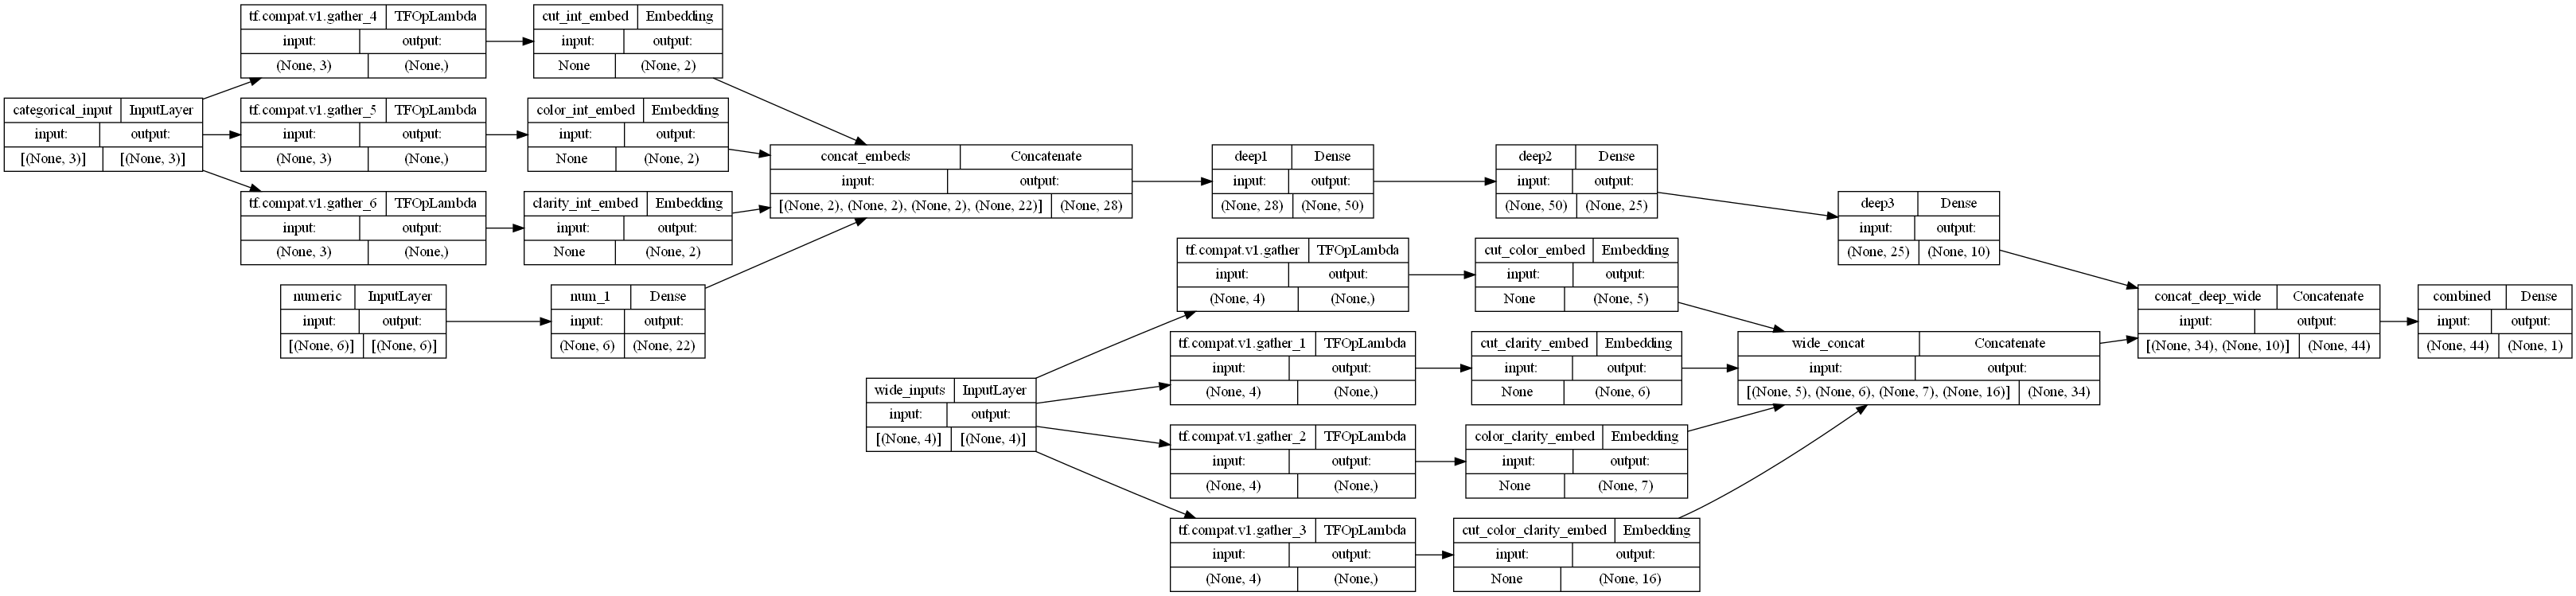

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [22]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
1349/1349 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.8618 - val_loss: 0.2006 - val_accuracy: 0.9038
Epoch 2/15
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1790 - accuracy: 0.9030 - val_loss: 0.1573 - val_accuracy: 0.9038
Epoch 3/15
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1393 - accuracy: 0.9030 - val_loss: 0.1225 - val_accuracy: 0.9038
Epoch 4/15
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1113 - accuracy: 0.9030 - val_loss: 0.1009 - val_accuracy: 0.9038
Epoch 5/15
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0945 - accuracy: 0.9030 - val_loss: 0.0877 - val_accuracy: 0.9038
Epoch 6/15
1349/1349 [==============================] - 3s 2ms/step - loss: 0.0834 - accuracy: 0.9030 - val_loss: 0.0784 - val_accuracy: 0.9038
Epoch 7/15
1349/1349 [==============================] - 3s 3ms/step - loss: 0.0751 - accuracy: 0.9031 - val_loss: 0.0711 - val_accuracy:

In [23]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 1s 1ms/step
[[ 640  398]
 [ 142 9609]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.70      1038
           1       0.96      0.99      0.97      9751

    accuracy                           0.95     10789
   macro avg       0.89      0.80      0.84     10789
weighted avg       0.95      0.95      0.95     10789



Text(0.5, 0, 'epochs')

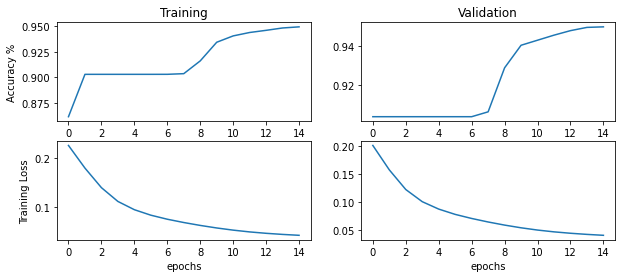

In [24]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.

### Exceptional Work

One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.